In [1]:
%run ../convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<h1>Problem 1</h1>
<h2>Task</h2>
Load the digits dataset and split it into a training set
and a test set (take the first 60,000 instances for training, and the remaining
10,000 for testing). Train a Random Forest classifier on the dataset and time how
long it takes, then evaluate the resulting model on the test set. Next, use PCA to
reduce the dataset’s dimensionality, with an explained variance ratio of 95%.
Train a new Random Forest classifier on the reduced dataset and see how long it
takes. Was training much faster? Next evaluate the classifier on the test set: how
does it compare to the previous classifier?
<h2>Solution</h2>

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_digits
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
digits = load_digits()
(X_train, y_train), (X_test, y_test) = load_data()
X_train = X_train.reshape((60000, -1))
X_test = X_test.reshape((10000, -1))

In [4]:
clf1 = RandomForestClassifier(random_state = 6)
%time clf1.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 4.4 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [5]:
clf1.score(X_test, y_test)

0.9479

<p class = 'note'>RandomForest with PCA</p>

In [6]:
pipe = make_pipeline(PCA(.95), RandomForestClassifier(random_state = 6))
%time pipe.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 23.6 s


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.95,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=6,
                                   

In [7]:
pipe.score(X_test, y_test)

0.892

<p class = 'note'>Oh no! Training is actually more than twice slower now! How can that be? Well, as we saw in this chapter, dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm. </p>
<p class = 'highlight'>It is common for performance to drop slightly when reducing dimensionality, because we do lose some useful signal in the process. However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training and reduced performance. :(</p>

Let's try to use PCA with Softmax:

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
pipe = make_pipeline(PCA(.95), clf)
%time pipe.fit(X_train, y_train)

Wall time: 14.9 s


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.95,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [9]:
pipe.score(X_test, y_test)

0.9201

Much more better than using <code>RandomForest</code> with <code>PCA</code> now!

<h1>Problem 2</h1>
<h2>Task</h2>
Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the
result using Matplotlib. You can use a scatterplot using 10 different colors to rep‐
resent each image’s target class. Alternatively, you can write colored digits at the
location of each instance, or even plot scaled-down versions of the digit images
themselves (if you plot all digits, the visualization will be too cluttered, so you
should either draw a random sample or plot an instance only if no other instance
has already been plotted at a close distance). You should get a nice visualization
with well-separated clusters of digits. Try using other dimensionality reduction
algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.
<h2>Solution</h2>

In [11]:
from sklearn.manifold import isomap, LocallyLinearEmbedding, MDS, TSNE
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [13]:
model = TSNE(n_components = 2)
Xn = model.fit_transform(X)

(-79.50561795238133, 65.78452572826023, -68.73191076426801, 73.15415578990277)

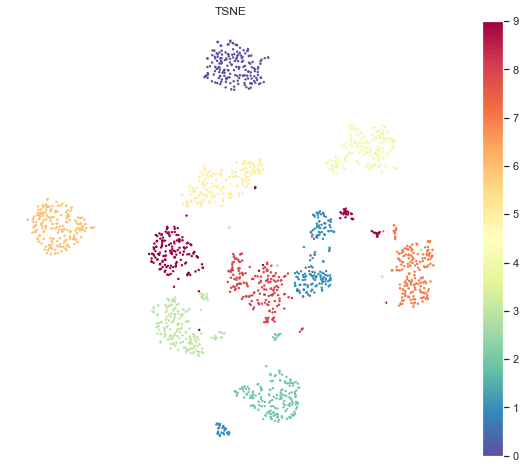

In [18]:
plt.figure(figsize = (10, 8))
plt.scatter(Xn[:,0], Xn[:,1], c = y, cmap = 'Spectral_r', s = 2)
plt.colorbar()
plt.title('TSNE')
plt.axis('off')

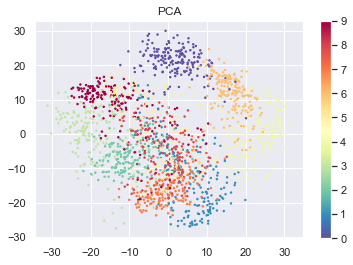

In [21]:
Xn = PCA(n_components = 2).fit_transform(X)
plt.scatter(Xn[:,0], Xn[:,1], c = y, cmap = 'Spectral_r', s = 2)
plt.title('PCA')
plt.colorbar()

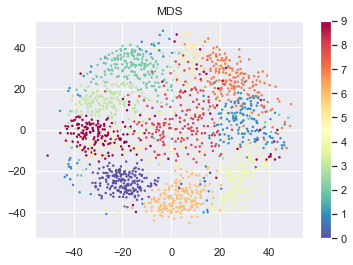

In [23]:
Xn = MDS(n_components=2).fit_transform(X[:2000])
plt.scatter(Xn[:,0], Xn[:,1], c = y, cmap = 'Spectral_r', s = 2)
plt.title('MDS')
plt.colorbar()

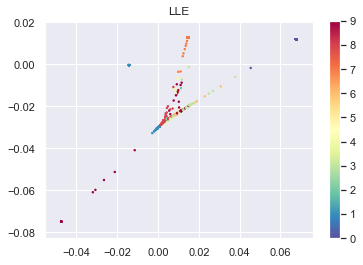

In [26]:
Xn = make_pipeline(PCA(.95), LocallyLinearEmbedding(n_components=2)).fit_transform(X)
plt.scatter(Xn[:,0], Xn[:,1], c = y, cmap = 'Spectral_r', s = 2)
plt.title('LLE')
plt.colorbar()